In [1]:
import fastai
from fastai.vision import *
from fastai.callbacks import *
from fastai.utils.mem import *

from pathlib import Path

In [2]:
path = Path("./dataset/training_set")

In [3]:
tfms =  get_transforms(max_rotate=25)
data = (ImageList.from_folder(path.absolute(), ignore_empty=True)
        .split_by_rand_pct(seed=7356)
        .label_from_folder()
        .transform(tfms, size=224)
        .databunch(bs=64)
        .normalize(imagenet_stats))  

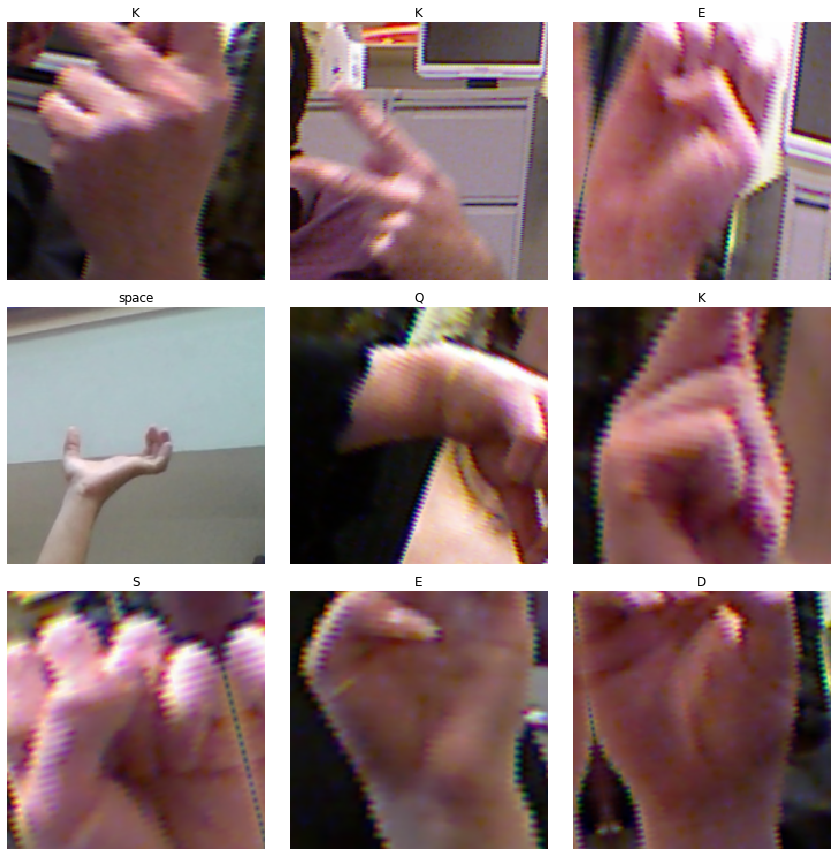

In [4]:
data.show_batch(3)

In [5]:
kappa = KappaScore()
kappa.weights = "quadratic"

learner = cnn_learner(data, models.resnet18, metrics=[accuracy, top_k_accuracy, kappa], model_dir=Path("./model").absolute())

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,kappa_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


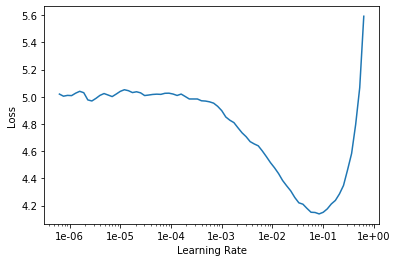

In [6]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,kappa_score,time
0,0.879817,0.431307,0.858240,0.986192,0.905979,02:26
1,1.831315,1.134373,0.704607,0.949735,0.760706,02:23
2,1.266781,0.616031,0.832624,0.984062,0.888288,02:35
3,0.881799,0.412057,0.880114,0.991289,0.926905,02:32
4,0.557271,0.174442,0.956317,0.995870,0.970041,02:32
5,0.337143,0.079576,0.975158,0.998193,0.982781,02:32
6,0.249493,0.064318,0.979933,0.998645,0.986503,02:31


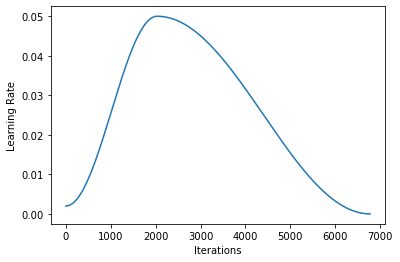

In [7]:
lr = 5e-3
learner.fit_one_cycle(7, max_lr=slice(lr, lr*10))
learner.recorder.plot_lr()

In [8]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('U', 'R', 25),
 ('R', 'U', 14),
 ('K', 'V', 10),
 ('K', 'R', 8),
 ('N', 'M', 8),
 ('C', 'O', 7),
 ('S', 'E', 7),
 ('S', 'N', 7),
 ('T', 'N', 7),
 ('A', 'T', 6),
 ('F', 'W', 6),
 ('G', 'H', 6),
 ('M', 'S', 6),
 ('P', 'Q', 6),
 ('Q', 'P', 6),
 ('T', 'X', 6),
 ('I', 'A', 5),
 ('C', 'G', 4),
 ('C', 'Q', 4),
 ('M', 'N', 4),
 ('N', 'E', 4),
 ('P', 'R', 4),
 ('R', 'Y', 4),
 ('X', 'T', 4),
 ('E', 'O', 3),
 ('M', 'E', 3),
 ('N', 'X', 3),
 ('P', 'D', 3),
 ('R', 'I', 3),
 ('V', 'U', 3),
 ('W', 'V', 3),
 ('C', 'X', 2),
 ('D', 'B', 2),
 ('D', 'R', 2),
 ('E', 'S', 2),
 ('F', 'D', 2),
 ('G', 'T', 2),
 ('G', 'X', 2),
 ('H', 'G', 2),
 ('I', 'R', 2),
 ('K', 'D', 2),
 ('L', 'D', 2),
 ('N', 'A', 2),
 ('N', 'K', 2),
 ('N', 'P', 2),
 ('N', 'R', 2),
 ('N', 'T', 2),
 ('O', 'C', 2),
 ('O', 'D', 2),
 ('R', 'K', 2),
 ('T', 'G', 2),
 ('T', 'M', 2),
 ('W', 'U', 2),
 ('X', 'I', 2),
 ('X', 'N', 2),
 ('Y', 'D', 2),
 ('Y', 'I', 2),
 ('Y', 'V', 2)]

In [9]:
learner.save("stage-1")
#learner.load("stage-1")
learner.unfreeze()
learner.fit_one_cycle(7, max_lr=slice(lr//2, lr))

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,kappa_score,time
0,0.361851,0.261534,0.949284,0.996580,0.944644,02:39
1,0.321899,0.199116,0.960447,0.996064,0.968330,02:38
2,0.233797,0.086543,0.972900,0.997419,0.978568,02:37
3,0.126207,0.047166,0.984708,0.999161,0.989328,02:41
4,0.074744,0.019902,0.993999,0.999677,0.997003,02:38
5,0.051695,0.007809,0.996903,0.999806,0.997558,02:37
6,0.037919,0.005993,0.998580,0.999871,0.999064,02:38


In [10]:
interpreter = ClassificationInterpretation.from_learner(learner)

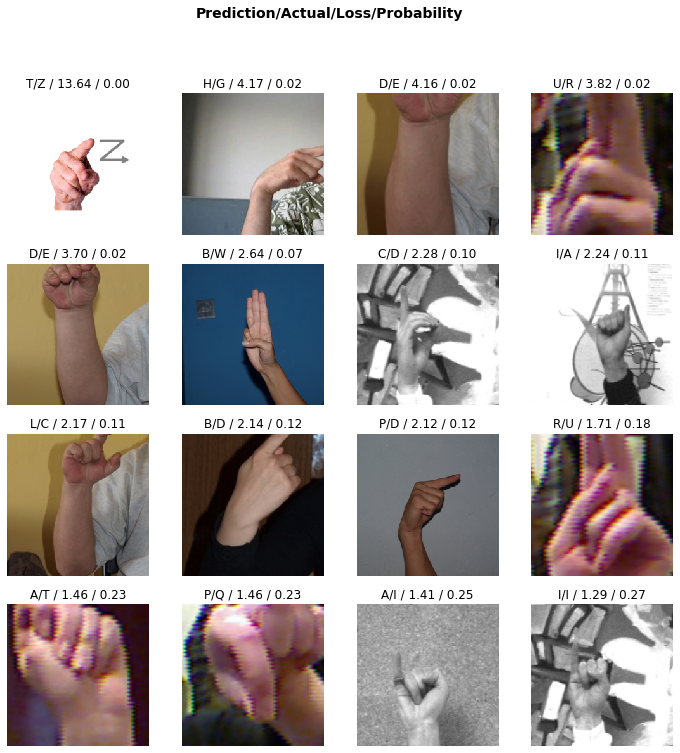

In [11]:
interpreter.plot_top_losses(16, figsize=(12, 12))

In [12]:
interpreter.most_confused(min_val=2)

[('E', 'D', 2), ('G', 'H', 2), ('R', 'U', 2)]

In [14]:
learner.save("stage-2")
#learner.load("stage-2")